<a href="https://colab.research.google.com/github/CarloRomeoGitHub/ML-exercises/blob/master/ML_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#!pip install -q kaggle


In [39]:
#uploaded = files.upload()
!pip install -q xlrd
!git clone https://github.com/CarloRomeoGitHub/ML-exercises.git

Cloning into 'ML-exercises'...


In [0]:
#IMPORT
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.utils
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import math


In [26]:
ds = pd.read_csv('train.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
 dsc = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2574d806a0>,
      dtype=object)

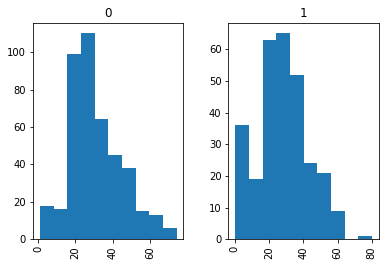

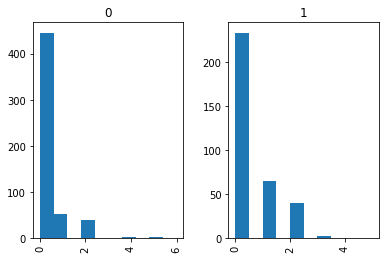

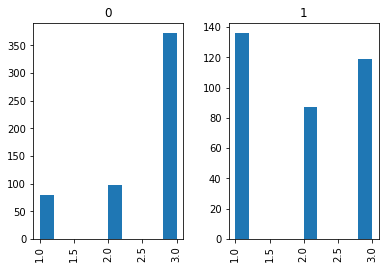

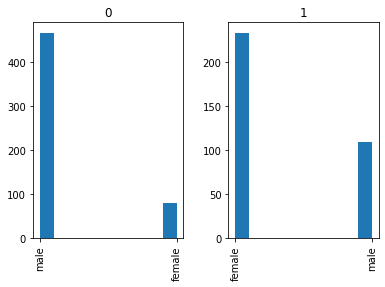

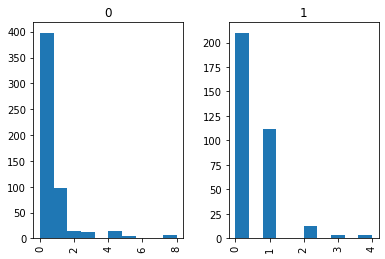

In [31]:
dsc.hist('Age', 'Survived',  )
dsc.hist('Parch', 'Survived' )
dsc.hist('Pclass', 'Survived' )
dsc.hist('Sex', 'Survived' )
dsc.hist('SibSp', 'Survived' )


In [32]:
cat = 'Sex'
#categorical_cols = ds.columns[categorical_feature_mask].tolist()
encoder = LabelEncoder()
dsc[cat] =  encoder.fit_transform(dsc[cat])
dsc[cat]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [0]:
dsc[['Age']] = dsc[['Age']].replace(0, np.NaN)
dsc['Age'].mean()
dsc.fillna(29, inplace= True)

In [34]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
x = dsc[features]
print(x)
y = dsc['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 42)
print(y_train)


     Pclass  Sex   Age  SibSp  Parch
0         3    1  22.0      1      0
1         1    0  38.0      1      0
2         3    0  26.0      0      0
3         1    0  35.0      1      0
4         3    1  35.0      0      0
..      ...  ...   ...    ...    ...
886       2    1  27.0      0      0
887       1    0  19.0      0      0
888       3    0  29.0      1      2
889       1    1  26.0      0      0
890       3    1  32.0      0      0

[891 rows x 5 columns]
298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64


In [0]:
model = DecisionTreeClassifier(x_train, y_train, random_state  = 42)


In [36]:
model.fit(x_train, y_train)

TypeError: ignored